# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load dataset

In [2]:
dataset = pd.read_csv('datasets/Salary_Data.csv')

In [3]:
dataset.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X[:5])

[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]


# Clean data

In [6]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X)
X = imp_mean.transform(X)
print(X[:5])

[[1.1]
 [1.3]
 [1.5]
 [2. ]
 [2.2]]


# Split data between train and test

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=1)

# Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
print('X_test', X_test[:5])
print('X_train', X_train[:5])

X_test [[ 0.14042184]
 [ 0.74948043]
 [-0.3332904 ]
 [ 0.37727796]
 [-0.13027087]]
X_train [[ 1.12168291]
 [-0.9085124 ]
 [-1.14536852]
 [ 1.39237561]
 [-0.63781969]]


# Create a model and fit

In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

predicted = lr.predict(X_test)

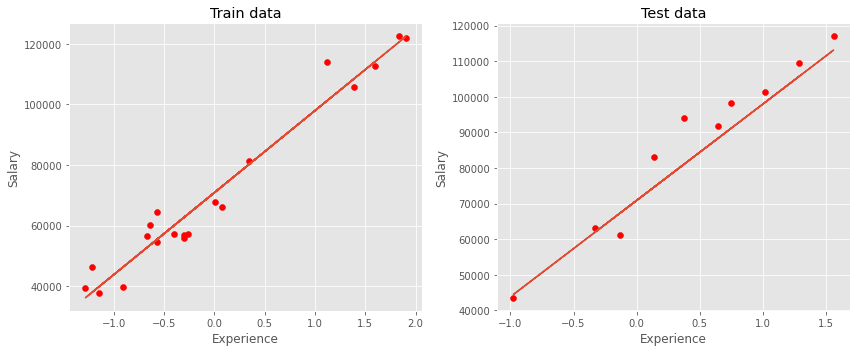

In [11]:
plt.style.use('ggplot')

f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(1, 2, 1)
ax2 = f.add_subplot(1, 2, 2)
ax1.scatter(X_train, y_train, c='r')
ax1.plot(X_train, lr.predict(X_train))
ax1.set_xlabel('Experience')
ax1.set_ylabel('Salary')
ax1.set_title('Train data')

ax2.scatter(X_test, y_test, c='r')
ax2.plot(X_test, lr.predict(X_test))
ax2.set_xlabel('Experience')
ax2.set_ylabel('Salary')
ax2.set_title('Test data')

plt.tight_layout()

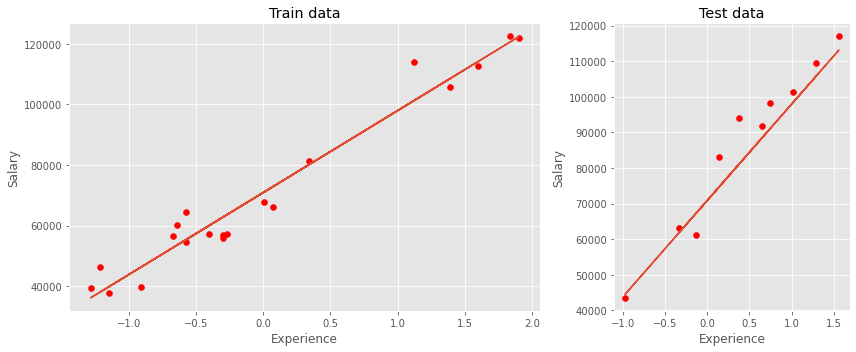

In [12]:
from matplotlib import gridspec
plt.style.use('ggplot')

f = plt.figure(figsize=(12,5))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])
ax1 = f.add_subplot(gs[0])
ax2 = f.add_subplot(gs[1])
ax1.scatter(X_train, y_train, c='r')
ax1.plot(X_train, lr.predict(X_train))
ax1.set_xlabel('Experience')
ax1.set_ylabel('Salary')
ax1.set_title('Train data')

ax2.scatter(X_test, y_test, c='r')
ax2.plot(X_test, lr.predict(X_test))
ax2.set_xlabel('Experience')
ax2.set_ylabel('Salary')
ax2.set_title('Test data')

plt.tight_layout()

In [18]:
print('lr coefficients', lr.coef_)
print('lr intercept', lr.intercept_)
print('line equation would be')
print(f'salary = {lr.coef_[0]} x Experience + {lr.intercept_} ')

lr coefficients [27065.7877089]
lr intercept 70874.75
line equation would be
salary = 27065.78770889806 x Experience + 70874.75 
